In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving soc-sign-bitcoinotc.csv to soc-sign-bitcoinotc.csv


In [ ]:
import pandas as pd
import io

# Use the filename as the key to access the contents of the file.
filename = next(iter(uploaded.keys()))
df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None, names=['Source', 'Target', 'Rating', 'Time'])
df['Time'] = pd.to_datetime(df['Time'], unit='s')


In [ ]:
df.head(10)

,Source,Target,Rating,Time
0,6,2,4,2010-11-08 18:45:12
1,6,5,2,2010-11-08 18:45:42
2,1,15,1,2010-11-08 19:05:40
3,4,3,7,2010-11-08 19:41:17
4,13,16,8,2010-11-08 22:10:54
5,13,10,8,2010-11-08 22:11:41
6,7,5,1,2010-11-10 04:18:20
7,2,21,5,2010-11-10 06:29:17
8,2,20,5,2010-11-10 06:30:22
9,21,2,5,2010-11-10 09:23:02


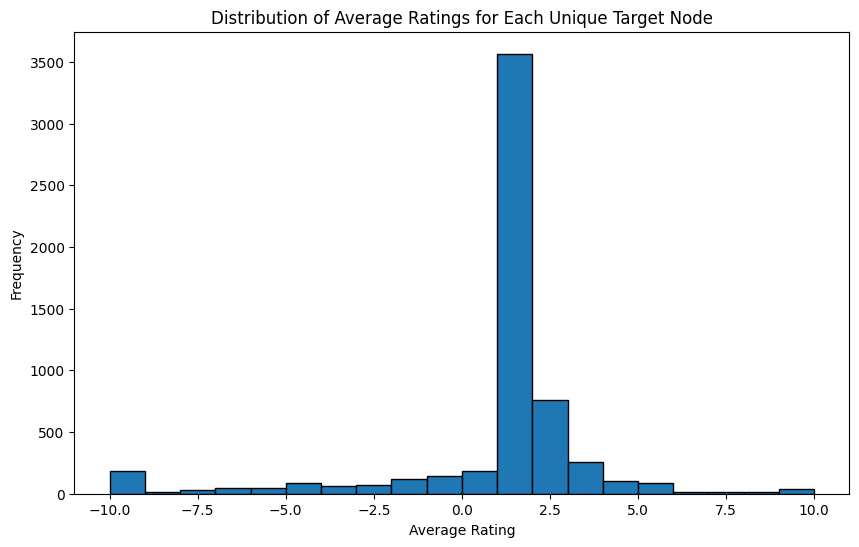

Targets with ratings separated by 10:
      Target  Avg_Rating  Mode_Rating  Max_Rating  Min_Rating
1          2    3.000000            1           8          -2
86       115    1.750000            1           6          -4
461      502    1.416667            1           5          -5
718      760    3.222222            5           5          -5
733      775    1.821429            1           9          -1
1225    1268    2.266667            1           9          -1
1274    1317    2.018182            1           9          -1
1782    1832    1.857143            1           9          -1
1951    2002   -3.250000           -9           1          -9
2021    2072    1.444444            1           5          -5
2142    2194    0.552632            1           5          -5
2772    2835    1.562500            1           9          -1
4748    4858   -3.000000           -8           2          -8
5386    5501   -2.666667            1           1          -9
5390    5505   -4.333333        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming that the DataFrame `df` is already loaded with the columns 'Source', 'Target', 'Rating', 'Time'

# Define a custom function to calculate mode
def calculate_mode(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result.iloc[0]
    else:
        return None

# Calculate average rating for each unique target node
avg_rating_per_target = df.groupby('Target')['Rating'].mean()

# Calculate mode of rating for each target node
mode_rating_per_target = df.groupby('Target')['Rating'].agg(calculate_mode)

# Calculate max rating for each target node
max_rating_per_target = df.groupby('Target')['Rating'].max()

# Calculate min rating for each target node
min_rating_per_target = df.groupby('Target')['Rating'].min()

# Combine all the statistics into one DataFrame
target_rating_stats = pd.DataFrame({
    'Avg_Rating': avg_rating_per_target,
    'Mode_Rating': mode_rating_per_target,
    'Max_Rating': max_rating_per_target,
    'Min_Rating': min_rating_per_target
}).reset_index()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
avg_rating_per_target.hist(bins=20, edgecolor='black')
plt.title('Distribution of Average Ratings for Each Unique Target Node')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Show the first few rows of the rating statistics for each target node
target_rating_stats.head()

# Filter targets with ratings separated by 10
targets_with_10_ratings_difference = target_rating_stats[target_rating_stats['Max_Rating'] - target_rating_stats['Min_Rating'] == 10]
print("Targets with ratings separated by 10:")
print(targets_with_10_ratings_difference)



In [ ]:
target_rating_stats.head()

,Target,Avg_Rating,Mode_Rating,Max_Rating,Min_Rating
0,1,3.544248,1,10,1
1,2,3.000000,1,8,-2
2,3,-0.285714,-10,8,-10
3,4,3.111111,1,10,1
4,5,2.333333,1,4,1


In [ ]:
# Filter targets with mode rating of -10 or 10
targets_mode_minus_10_or_10 = target_rating_stats[
    (target_rating_stats['Mode_Rating'] == -10) | (target_rating_stats['Mode_Rating'] == 10)
]

print("Targets with mode rating of -10 or 10:")
print(targets_mode_minus_10_or_10)


Targets with mode rating of -10 or 10:
      Target  Avg_Rating  Mode_Rating  Max_Rating  Min_Rating
2          3   -0.285714          -10           8         -10
18        25    2.610619           10          10         -10
43        61   -0.555556          -10           5         -10
219      260   -1.666667          -10           4         -10
269      310   -5.142857          -10           4         -10
...      ...         ...          ...         ...         ...
5827    5973  -10.000000          -10         -10         -10
5829    5975  -10.000000          -10         -10         -10
5830    5976  -10.000000          -10         -10         -10
5831    5977  -10.000000          -10         -10         -10
5847    5993  -10.000000          -10         -10         -10

[567 rows x 5 columns]


In [ ]:
# Filter targets with mode rating of -10
targets_mode_minus_10 = target_rating_stats[target_rating_stats['Mode_Rating'] == -10]
# Count the number of targets with mode rating of -10
count_mode_minus_10 = len(targets_mode_minus_10)

# Filter targets with mode rating of 10
targets_mode_10 = target_rating_stats[target_rating_stats['Mode_Rating'] == 10]
# Count the number of targets with mode rating of 10
count_mode_10 = len(targets_mode_10)

print("Count of targets with mode rating of -10:", count_mode_minus_10)
print("Count of targets with mode rating of 10:", count_mode_10)


Count of targets with mode rating of -10: 525
Count of targets with mode rating of 10: 42


In [ ]:
# Filter the original DataFrame to get nodes with mode rating of -10 and +10 separately
nodes_mode_minus_10 = target_rating_stats[target_rating_stats['Mode_Rating'] == -10]['Target'].tolist()
nodes_mode_10 = target_rating_stats[target_rating_stats['Mode_Rating'] == 10]['Target'].tolist()

# Print the lists of nodes for mode rating of -10 and +10
print("Nodes with mode rating of -10:", nodes_mode_minus_10)
print("Nodes with mode rating of +10:", nodes_mode_10)


Nodes with mode rating of -10: [3, 61, 260, 310, 315, 410, 472, 574, 672, 713, 733, 766, 787, 805, 824, 870, 906, 957, 958, 984, 1074, 1099, 1116, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1211, 1293, 1308, 1327, 1329, 1363, 1383, 1387, 1393, 1443, 1535, 1543, 1572, 1600, 1609, 1671, 1705, 1719, 1750, 1753, 1756, 1792, 1853, 1862, 1917, 1956, 2017, 2096, 2148, 2209, 2225, 2239, 2245, 2343, 2367, 2434, 2471, 2498, 2503, 2505, 2514, 2516, 2522, 2530, 2532, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2548, 2549, 2561, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2581, 2585, 2592, 2597, 2598, 2601, 2602, 2603, 2617, 2619, 2621, 2622, 2623, 2628, 2629, 2631, 2632, 2634, 2657, 2660, 2666, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2680, 2682, 2683, 2684, 2689, 2690, 2694, 2695, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2712, 2714, 2717, 2718, 2720, 2721, 2722, 2735, 2736, 2737, 2738, 2741, 2743, 2744, 2745, 2747, 2753, 2766, 2778, 2

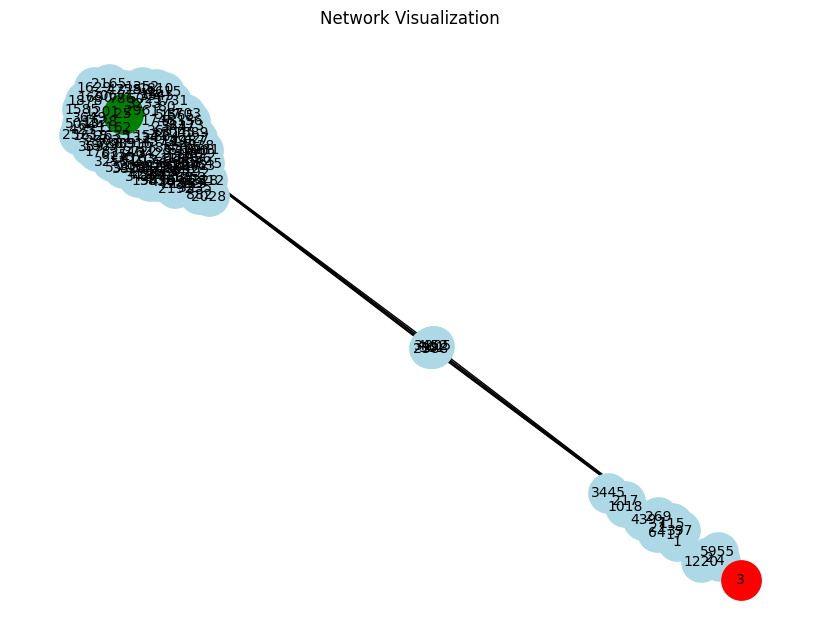

In [ ]:
def plot_network_for_nodes(node_minus_10, node_10):
    # Create a subgraph of the original graph with only the selected nodes
    subgraph_nodes = [node_minus_10, node_10]
    subgraph_df = df[df['Target'].isin(subgraph_nodes)]

    # Create a directed graph
    G = nx.from_pandas_edgelist(subgraph_df, 'Source', 'Target', create_using=nx.DiGraph())

    # Plot the network
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Layout for the nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
    nx.draw_networkx_nodes(G, pos, nodelist=[node_minus_10], node_color='red', node_size=800)
    nx.draw_networkx_nodes(G, pos, nodelist=[node_10], node_color='green', node_size=800)
    plt.title('Network Visualization')
    plt.show()

# Example usage:
# Choose one node from each category to plot the network
node_minus_10 = nodes_mode_minus_10[0]
node_10 = nodes_mode_10[0]
plot_network_for_nodes(node_minus_10, node_10)


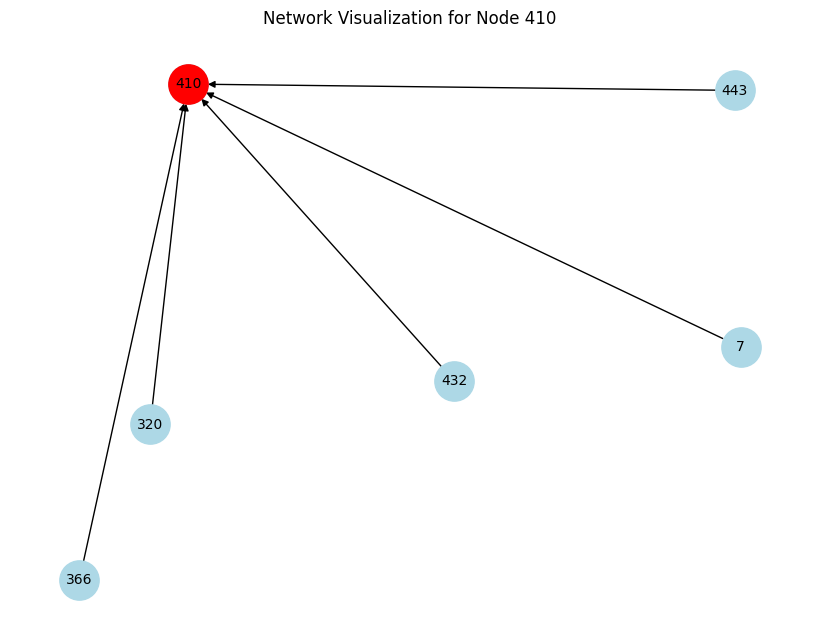

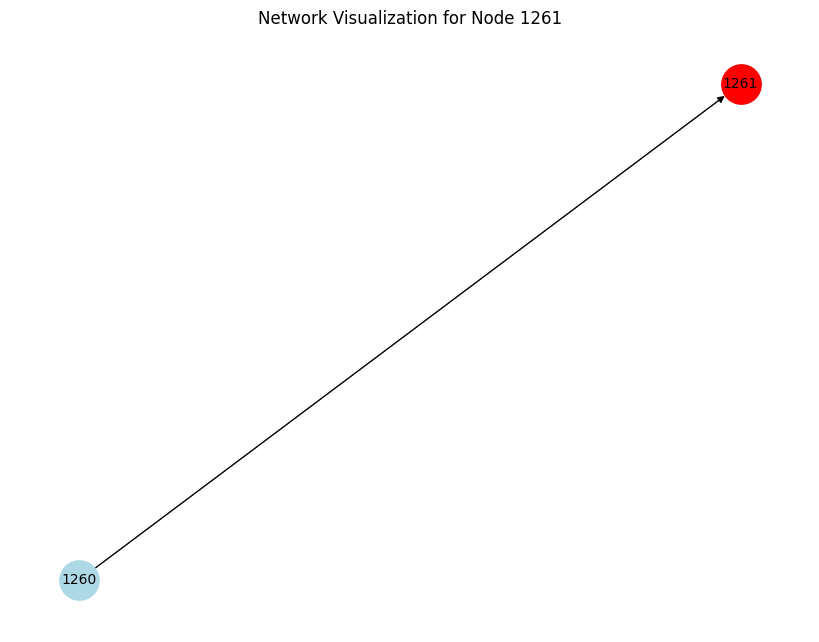

In [ ]:
def plot_network_for_node(node):
    # Create a subgraph of the original graph with only the selected node
    subgraph_df = df[df['Target'] == node]

    # Create a directed graph
    G = nx.from_pandas_edgelist(subgraph_df, 'Source', 'Target', create_using=nx.DiGraph())

    # Plot the network
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Layout for the nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color='red', node_size=800)
    plt.title(f'Network Visualization for Node {node}')
    plt.show()

# Example usage:
# Choose one node from each category to plot the network
node_minus_10 = nodes_mode_minus_10[5]  # Choose a node with mode rating of -10
node_10 = nodes_mode_10[5]  # Choose a node with mode rating of +10

# Plot the network for the chosen nodes one at a time
plot_network_for_node(node_minus_10)
plot_network_for_node(node_10)


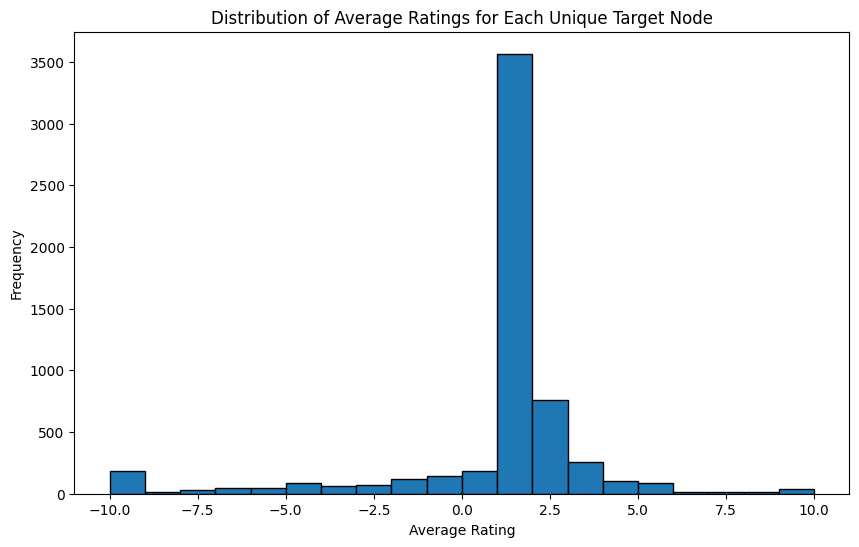

First few rows of rating statistics for each target node:
   Target  Avg_Rating  Mode_Rating  Max_Rating  Min_Rating  Count_Rating_10  \
0       1    3.544248            1          10           1             23.0   
1       2    3.000000            1           8          -2              0.0   
2       3   -0.285714          -10           8         -10              0.0   
3       4    3.111111            1          10           1              1.0   
4       5    2.333333            1           4           1              0.0   

   Count_Rating_minus_10  
0                    0.0  
1                    0.0  
2                    5.0  
3                    0.0  
4                    0.0  

Targets with ratings separated by 10:
      Target  Avg_Rating  Mode_Rating  Max_Rating  Min_Rating  \
1          2    3.000000            1           8          -2   
86       115    1.750000            1           6          -4   
461      502    1.416667            1           5          -5   
718   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming that the DataFrame `df` is already loaded with the columns 'Source', 'Target', 'Rating', 'Time'

# Define a custom function to calculate mode
def calculate_mode(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result.iloc[0]
    else:
        return None

# Calculate average rating for each unique target node
avg_rating_per_target = df.groupby('Target')['Rating'].mean()

# Calculate mode of rating for each target node
mode_rating_per_target = df.groupby('Target')['Rating'].agg(calculate_mode)

# Calculate max rating for each target node
max_rating_per_target = df.groupby('Target')['Rating'].max()

# Calculate min rating for each target node
min_rating_per_target = df.groupby('Target')['Rating'].min()

# Combine all the statistics into one DataFrame
target_rating_stats = pd.DataFrame({
    'Avg_Rating': avg_rating_per_target,
    'Mode_Rating': mode_rating_per_target,
    'Max_Rating': max_rating_per_target,
    'Min_Rating': min_rating_per_target
}).reset_index()

# Count of times rating +10 was given to each target
count_rating_10_per_target = df[df['Rating'] == 10].groupby('Target').size()

# Count of times rating -10 was given to each target
count_rating_minus_10_per_target = df[df['Rating'] == -10].groupby('Target').size()

# Merge counts with target_rating_stats DataFrame
target_rating_stats = target_rating_stats.merge(count_rating_10_per_target.rename('Count_Rating_10'),
                                                left_on='Target', right_index=True, how='left')
target_rating_stats = target_rating_stats.merge(count_rating_minus_10_per_target.rename('Count_Rating_minus_10'),
                                                left_on='Target', right_index=True, how='left')

# Fill NaN values with 0
target_rating_stats['Count_Rating_10'].fillna(0, inplace=True)
target_rating_stats['Count_Rating_minus_10'].fillna(0, inplace=True)

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
avg_rating_per_target.hist(bins=20, edgecolor='black')
plt.title('Distribution of Average Ratings for Each Unique Target Node')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Show the first few rows of the rating statistics for each target node
print("First few rows of rating statistics for each target node:")
print(target_rating_stats.head())

# Filter targets with ratings separated by 10
targets_with_10_ratings_difference = target_rating_stats[target_rating_stats['Max_Rating'] - target_rating_stats['Min_Rating'] == 10]
print("\nTargets with ratings separated by 10:")
print(targets_with_10_ratings_difference)


In [ ]:
# Filter the original DataFrame to get nodes with mode rating of -10 and +10 separately
nodes_mode_minus_10 = target_rating_stats[target_rating_stats['Mode_Rating'] == -10]['Target'].tolist()
nodes_mode_10 = target_rating_stats[target_rating_stats['Mode_Rating'] == 10]['Target'].tolist()

# Count the number of nodes with mode rating of -10 and +10
count_nodes_mode_minus_10 = len(nodes_mode_minus_10)
count_nodes_mode_10 = len(nodes_mode_10)

# Print the lists of nodes and their counts for mode rating of -10 and +10
print("Nodes with mode rating of -10 (Count:", count_nodes_mode_minus_10, "):", nodes_mode_minus_10)
print("Nodes with mode rating of +10 (Count:", count_nodes_mode_10, "):", nodes_mode_10)


Nodes with mode rating of -10 (Count: 525 ): [3, 61, 260, 310, 315, 410, 472, 574, 672, 713, 733, 766, 787, 805, 824, 870, 906, 957, 958, 984, 1074, 1099, 1116, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1211, 1293, 1308, 1327, 1329, 1363, 1383, 1387, 1393, 1443, 1535, 1543, 1572, 1600, 1609, 1671, 1705, 1719, 1750, 1753, 1756, 1792, 1853, 1862, 1917, 1956, 2017, 2096, 2148, 2209, 2225, 2239, 2245, 2343, 2367, 2434, 2471, 2498, 2503, 2505, 2514, 2516, 2522, 2530, 2532, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2548, 2549, 2561, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2581, 2585, 2592, 2597, 2598, 2601, 2602, 2603, 2617, 2619, 2621, 2622, 2623, 2628, 2629, 2631, 2632, 2634, 2657, 2660, 2666, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2680, 2682, 2683, 2684, 2689, 2690, 2694, 2695, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2712, 2714, 2717, 2718, 2720, 2721, 2722, 2735, 2736, 2737, 2738, 2741, 2743, 2744, 2745, 2747, 2753,

In [ ]:
# Count of times each node in nodes_mode_minus_10 was rated as -10
count_rating_minus_10_per_node_minus_10 = df[(df['Target'].isin(nodes_mode_minus_10)) & (df['Rating'] == -10)].groupby('Target').size()

# Count of times each node in nodes_mode_10 was rated as +10
count_rating_10_per_node_10 = df[(df['Target'].isin(nodes_mode_10)) & (df['Rating'] == 10)].groupby('Target').size()

# Print the counts for nodes in each list
print("Count of times each node in nodes_mode_minus_10 was rated as -10:")
print(count_rating_minus_10_per_node_minus_10)

print("\nCount of times each node in nodes_mode_10 was rated as +10:")
print(count_rating_10_per_node_10)


Count of times each node in nodes_mode_minus_10 was rated as -10:
Target
3       5
61      2
260     1
310     4
315     1
       ..
5973    1
5975    1
5976    1
5977    1
5993    1
Length: 525, dtype: int64

Count of times each node in nodes_mode_10 was rated as +10:
Target
25      35
529      1
814      1
1122     1
1191     2
1261     1
1326     1
1340     1
1501     1
1545     1
1663     1
1669     3
2078     1
2082     1
2305     3
2347     1
2377     3
2685     1
3125     1
3293     2
3484     1
3888     1
3975     1
4257     1
4261     1
4393     2
4639     1
4823     2
4824     1
5032     1
5162     1
5163     1
5284     1
5438     1
5568     1
5618     2
5720     1
5729     4
5761     1
5824     1
5826     1
5960     1
dtype: int64


In [ ]:
# Check if there are any edges connected to node 25 in the DataFrame
edges_connected_to_node_25 = df[(df['Source'] == 25) | (df['Target'] == 25)]
print(edges_connected_to_node_25)


       Source  Target  Rating                Time
20         10      25      10 2010-11-12 09:57:22
201        80      25       2 2011-01-17 16:43:51
253       119      25       1 2011-02-02 01:14:33
542        57      25       2 2011-03-08 04:04:18
846       149      25      10 2011-04-14 14:30:27
...       ...     ...     ...                 ...
33265    1746      25       3 2014-08-02 22:51:57
33628    2194      25       1 2014-08-27 16:44:34
34009    4365      25     -10 2014-10-14 14:29:26
34179    1394      25       2 2014-11-04 18:33:34
34889    4205      25       1 2015-03-28 15:10:38

[113 rows x 4 columns]


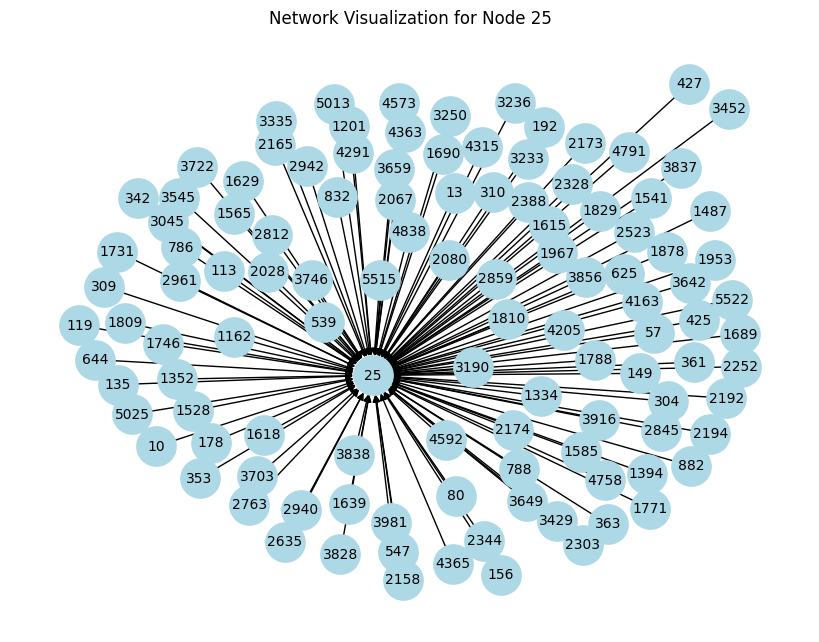

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter the original DataFrame to include only the edges connected to node 25
subgraph_df = df[df['Target'] == 25]

# Create a directed graph
G = nx.from_pandas_edgelist(subgraph_df, 'Source', 'Target', create_using=nx.DiGraph())

# Plot the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
plt.title('Network Visualization for Node 25')
plt.show()


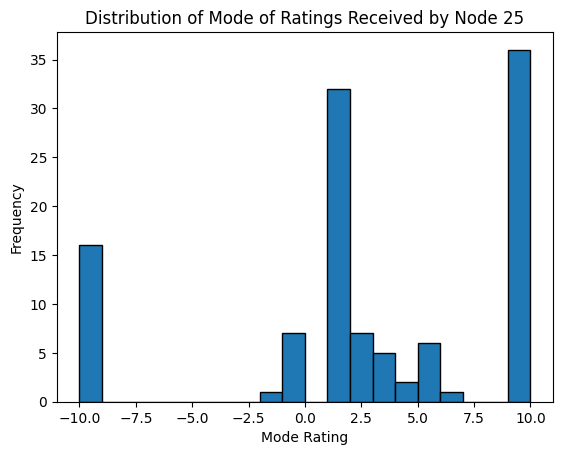

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import mode

# Filter the DataFrame to include only the rows where node 25 is the target
ratings_received_by_node_25 = df[df['Target'] == 25]['Rating']

# Calculate the mode of ratings received by node 25
mode_ratings_node_25 = ratings_received_by_node_25

# Plot the distribution of the mode of ratings received by node 25
plt.hist(mode_ratings_node_25, bins=20, edgecolor='black')
plt.title('Distribution of Mode of Ratings Received by Node 25')
plt.xlabel('Mode Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


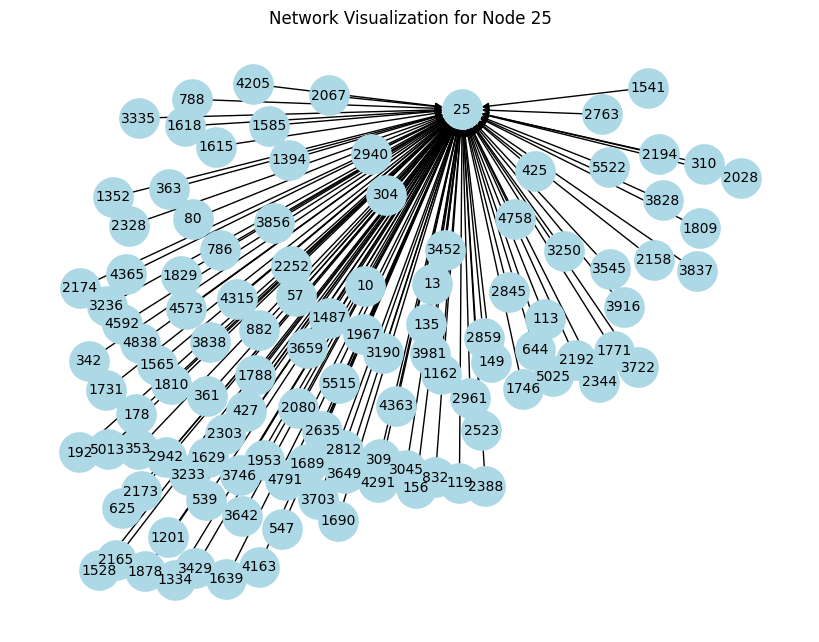

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter the original DataFrame to include only the edges connected to node 25
subgraph_df = df[df['Target'] == 25]

# Create a directed graph
G = nx.from_pandas_edgelist(subgraph_df, 'Source', 'Target', create_using=nx.DiGraph())

# Plot the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
plt.title('Network Visualization for Node 25')
plt.show()

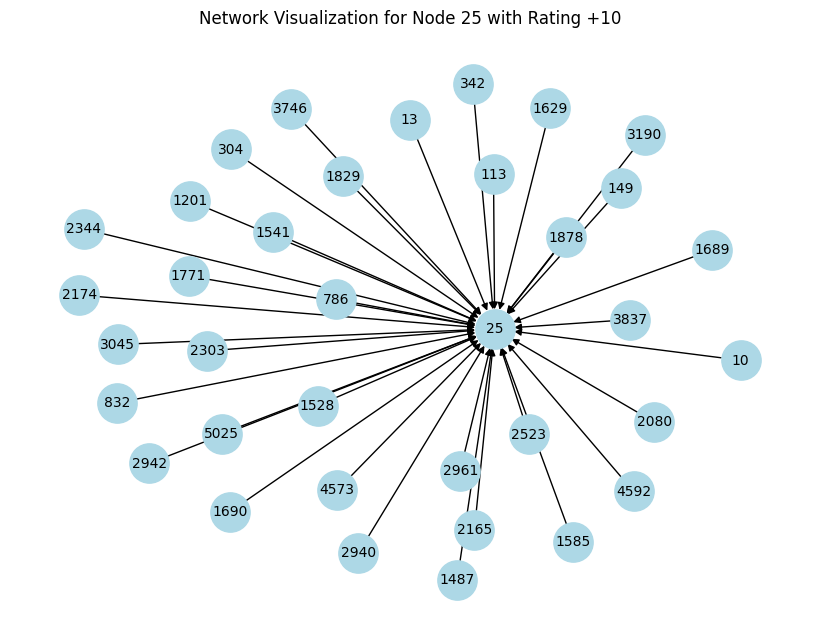

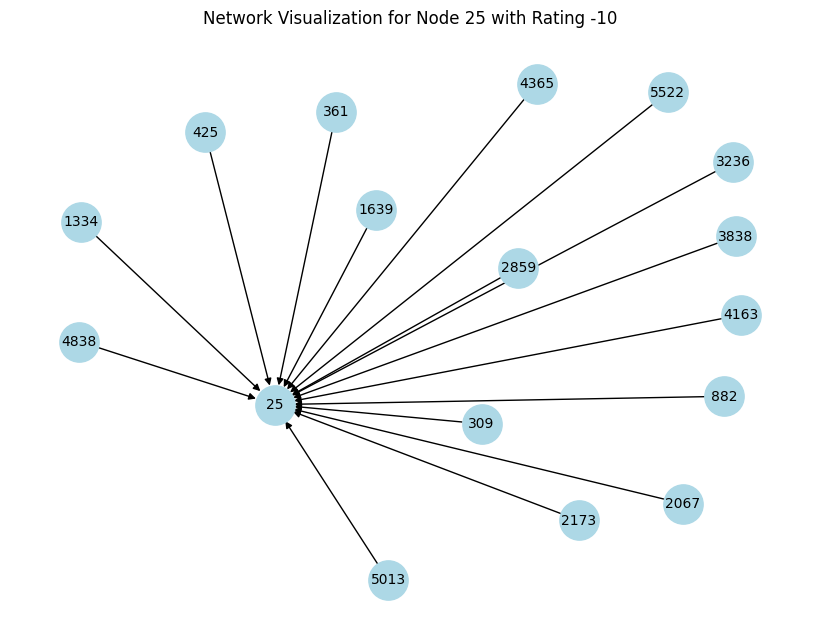

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter the original DataFrame to include only the edges with rating +10 and connected to node 25
subgraph_df_rating_10 = df[(df['Target'] == 25) & (df['Rating'] == 10)]

# Create a directed graph for rating +10
G_rating_10 = nx.from_pandas_edgelist(subgraph_df_rating_10, 'Source', 'Target', create_using=nx.DiGraph())

# Plot the network for rating +10
plt.figure(figsize=(8, 6))
pos_rating_10 = nx.spring_layout(G_rating_10)  # Layout for the nodes
nx.draw(G_rating_10, pos_rating_10, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
plt.title('Network Visualization for Node 25 with Rating +10')
plt.show()

# Filter the original DataFrame to include only the edges with rating -10 and connected to node 25
subgraph_df_rating_minus_10 = df[(df['Target'] == 25) & (df['Rating'] == -10)]

# Create a directed graph for rating -10
G_rating_minus_10 = nx.from_pandas_edgelist(subgraph_df_rating_minus_10, 'Source', 'Target', create_using=nx.DiGraph())

# Plot the network for rating -10
plt.figure(figsize=(8, 6))
pos_rating_minus_10 = nx.spring_layout(G_rating_minus_10)  # Layout for the nodes
nx.draw(G_rating_minus_10, pos_rating_minus_10, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
plt.title('Network Visualization for Node 25 with Rating -10')
plt.show()


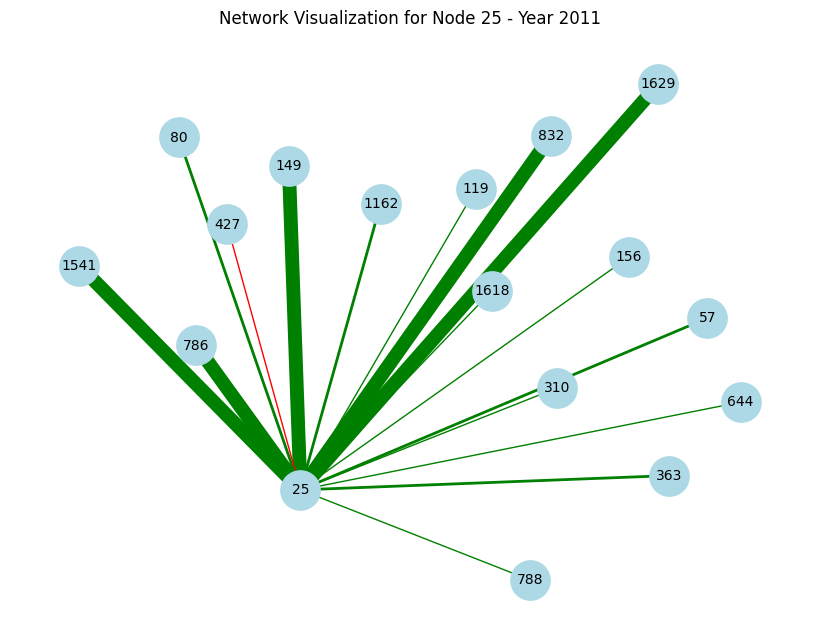

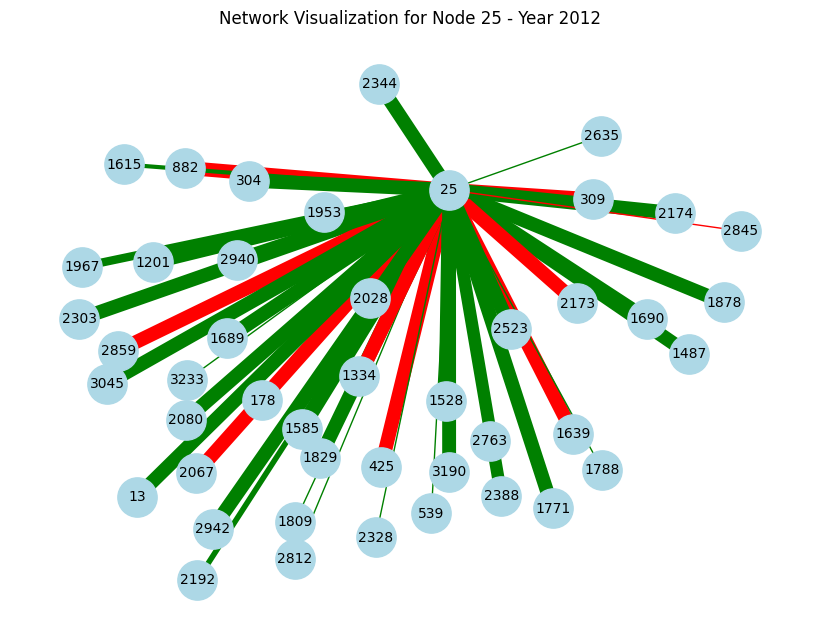

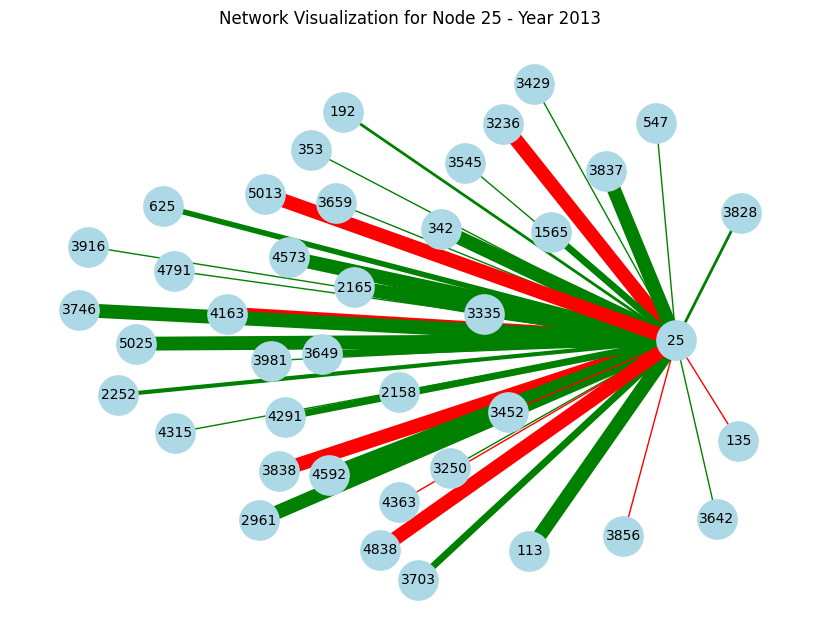

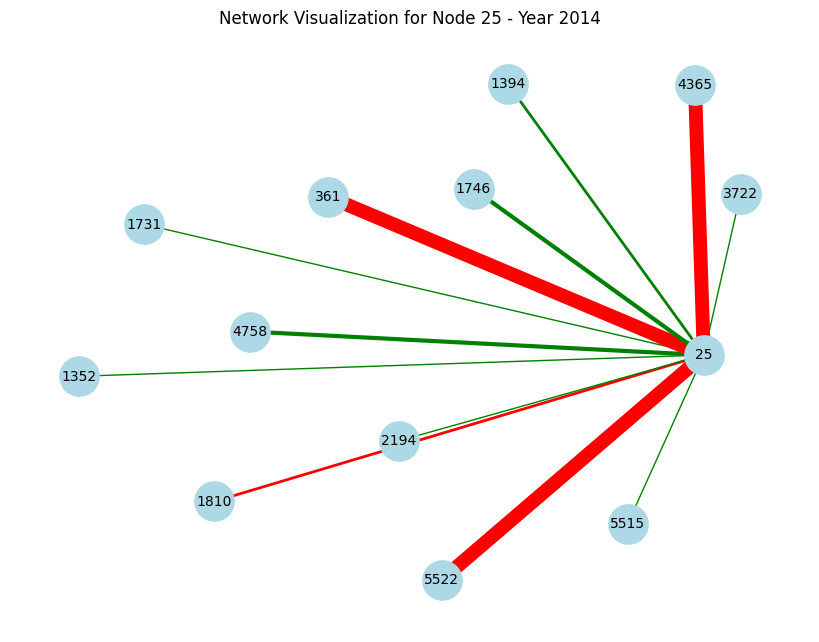

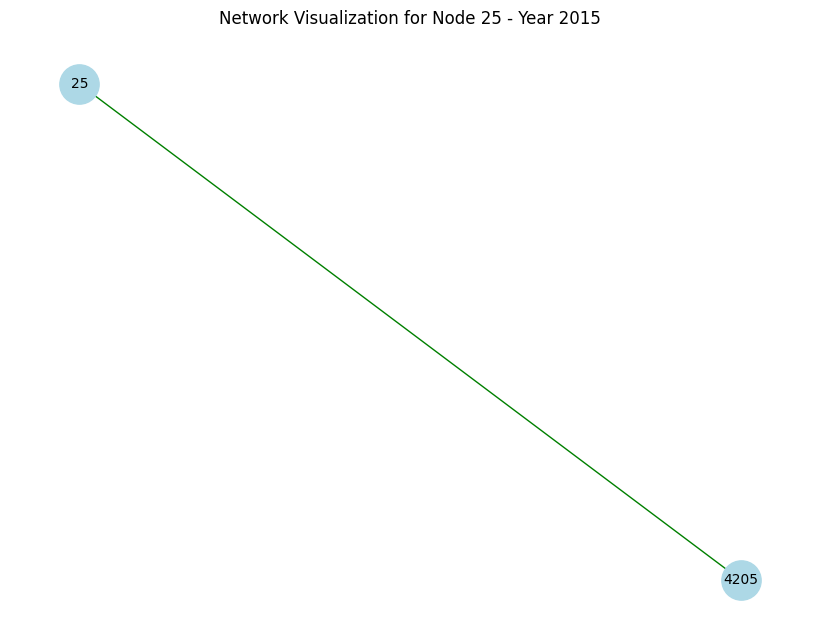

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Plot the network for each year from 2011 to 2015
for year in range(2011, 2016):
    # Filter the DataFrame to include only the edges connected to node 25 for the current year
    subgraph_df_year = df[(df['Target'] == 25) & (df['Time'].dt.year == year)]

    # Create a directed graph
    G = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', 'Rating', create_using=nx.DiGraph())

    # Assign edge colors and thickness based on the sign and magnitude of the rating
    edge_colors = ['green' if r > 0 else 'red' for u, v, r in G.edges(data='Rating')]
    edge_widths = [abs(r) for u, v, r in G.edges(data='Rating')]

    # Plot the network for the current year
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Layout for the nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, edge_color=edge_colors, width=edge_widths, arrows=False)
    plt.title(f'Network Visualization for Node 25 - Year {year}')
    plt.show()


In [ ]:
!pip uninstall community -y
!pip uninstall python-louvain -y


Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Successfully uninstalled community-1.0.0b1
Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Successfully uninstalled python-louvain-0.16


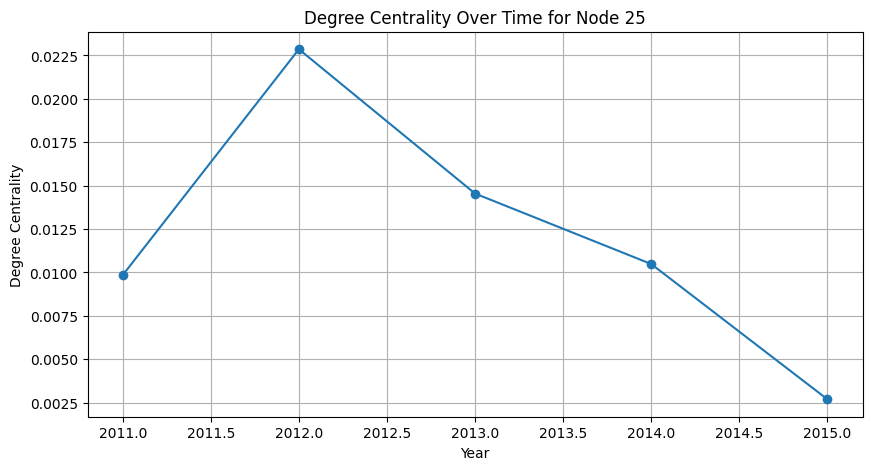

In [ ]:
# Function to plot centrality measures
def plot_centrality_over_time(node):
    years = range(2011, 2016)
    degree_centrality_values = []

    for year in years:
        subgraph_df_year = df[(df['Time'].dt.year == year)]
        G_year = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', create_using=nx.Graph())
        if node in G_year:
            degree_centrality_values.append(nx.degree_centrality(G_year)[node])
        else:
            degree_centrality_values.append(0)

    plt.figure(figsize=(10, 5))
    plt.plot(years, degree_centrality_values, marker='o', linestyle='-')
    plt.title(f'Degree Centrality Over Time for Node {node}')
    plt.xlabel('Year')
    plt.ylabel('Degree Centrality')
    plt.grid(True)
    plt.show()

plot_centrality_over_time(25)


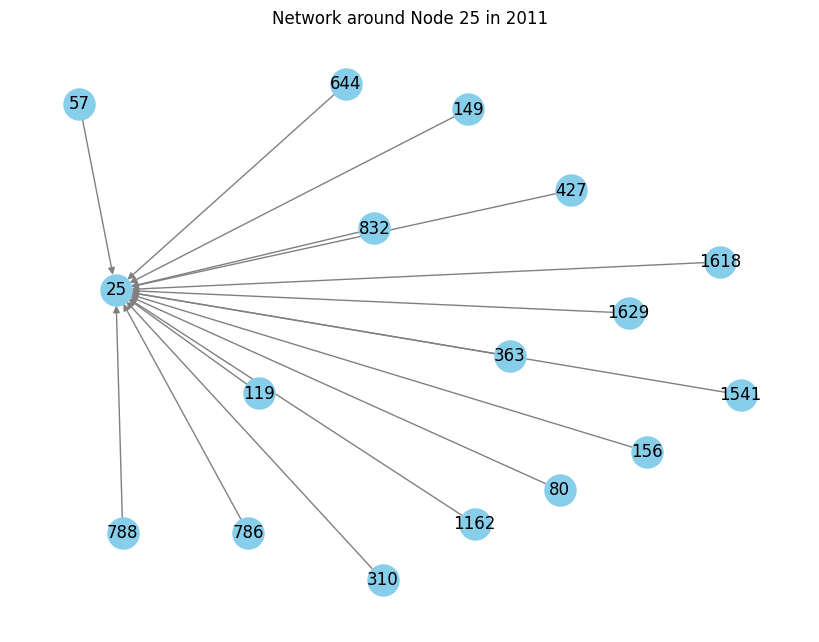

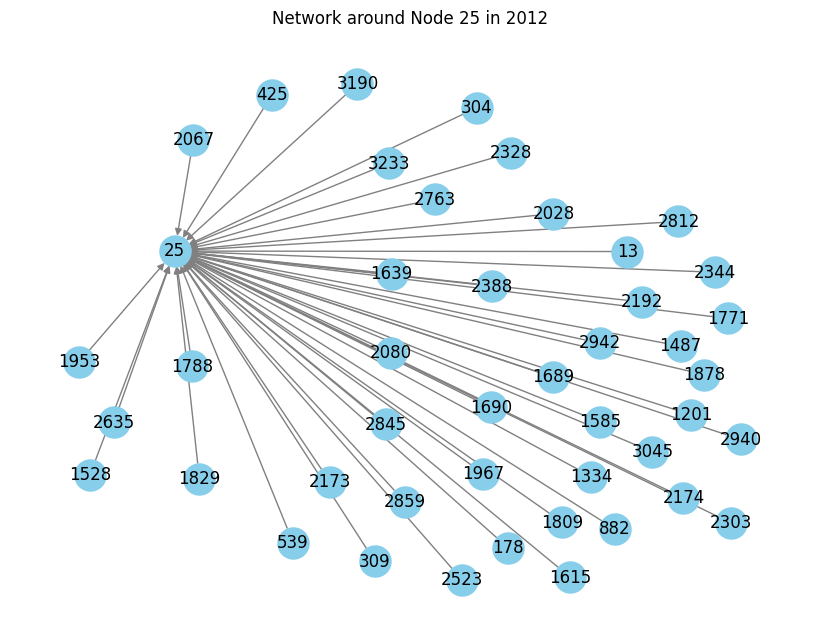

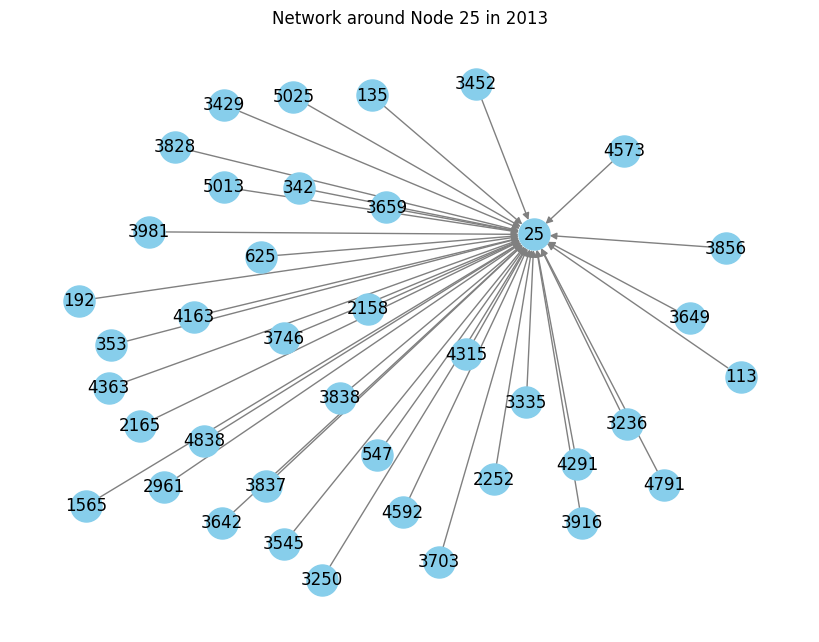

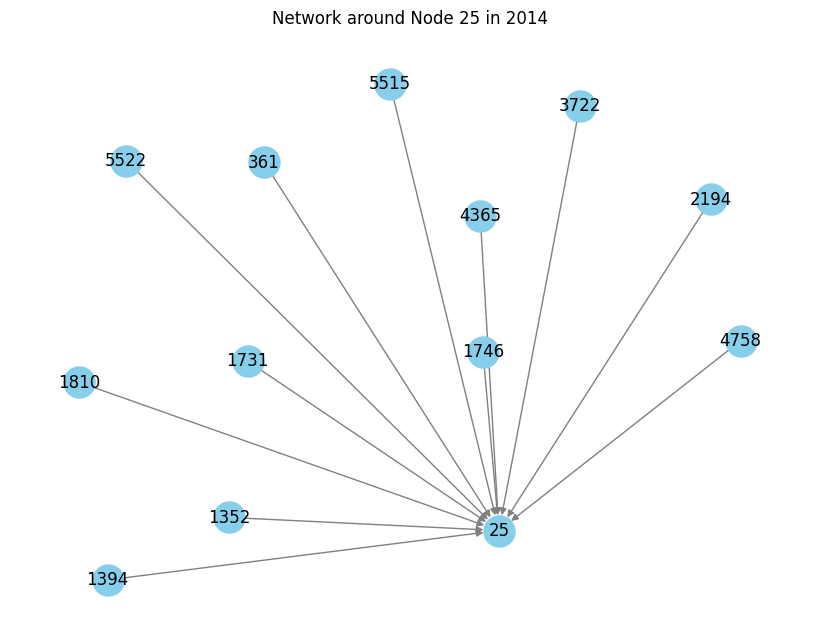

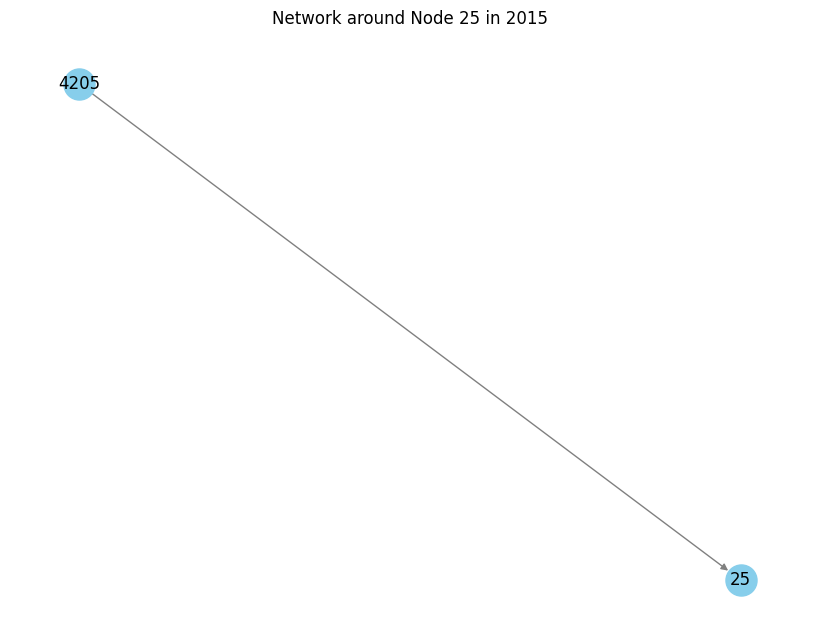

In [ ]:
def visualize_network_evolution(node, years=[2011, 2012, 2013, 2014, 2015]):
    for year in years:
        subgraph_df_year = df[(df['Time'].dt.year == year) & ((df['Source'] == node) | (df['Target'] == node))]
        G_year = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', create_using=nx.DiGraph())

        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G_year)
        nx.draw(G_year, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray")
        plt.title(f'Network around Node {node} in {year}')
        plt.show()

visualize_network_evolution(25)


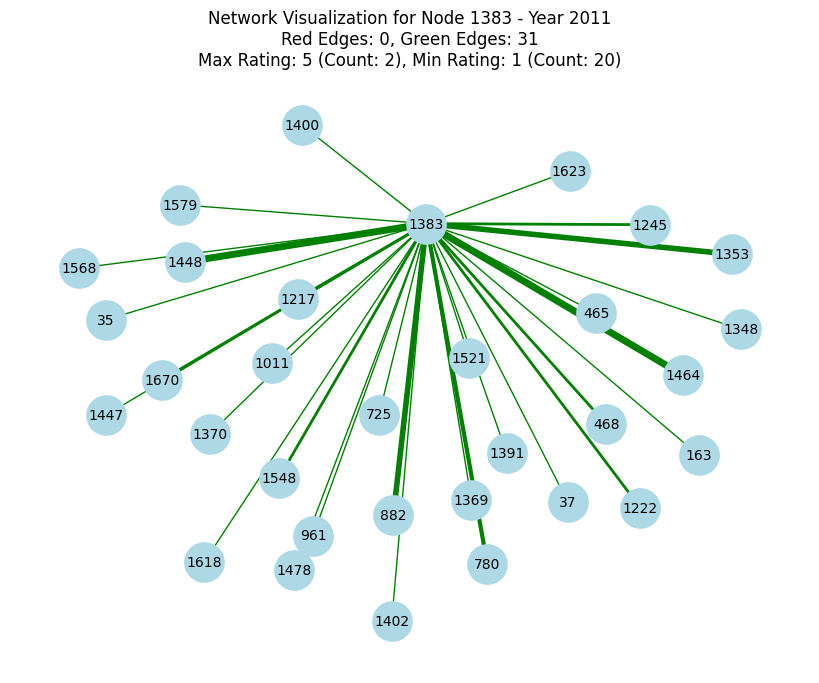

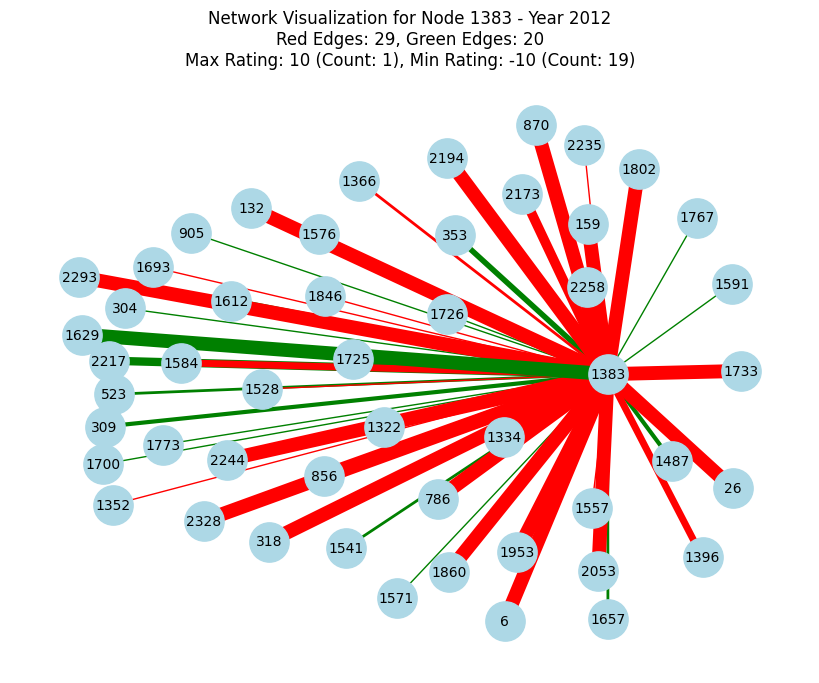

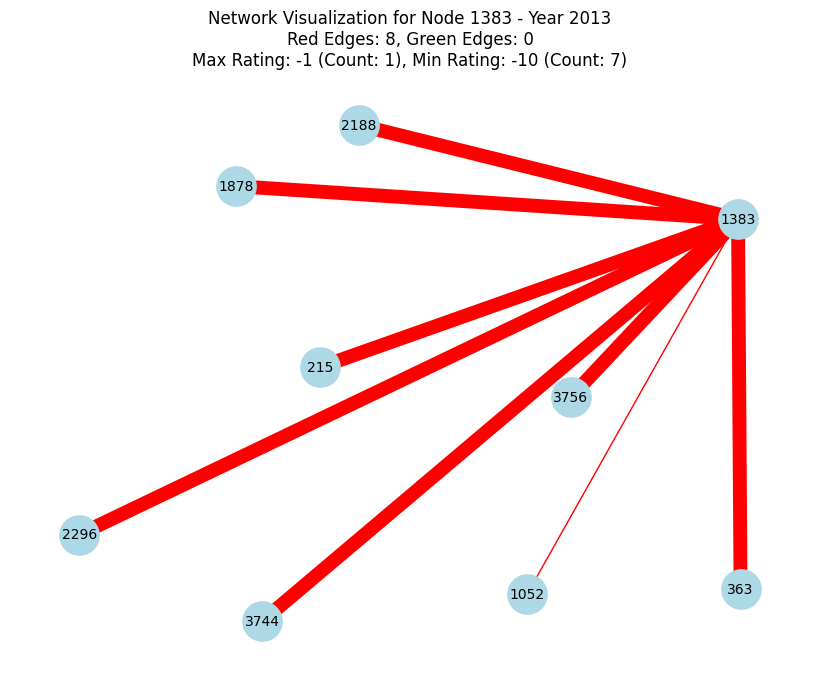

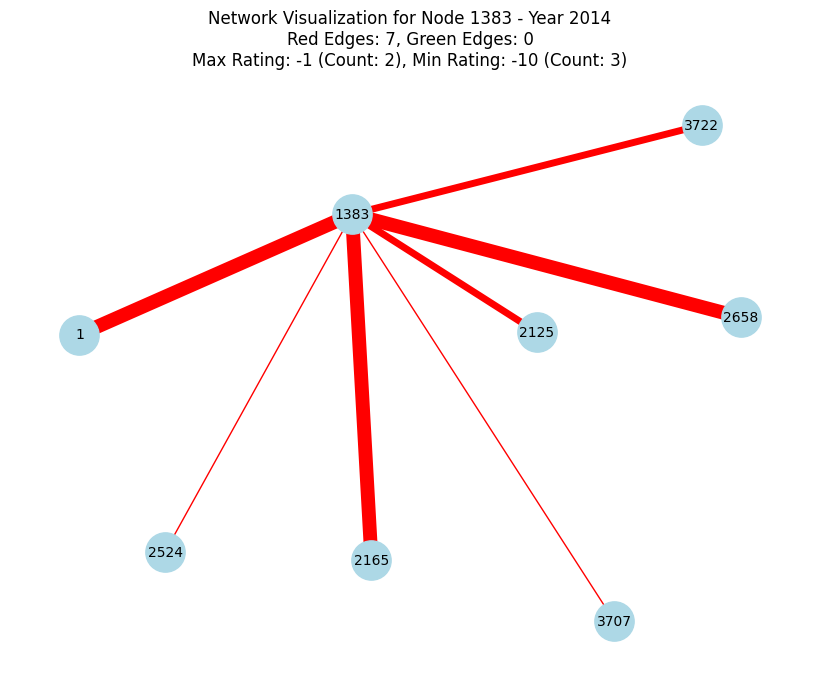

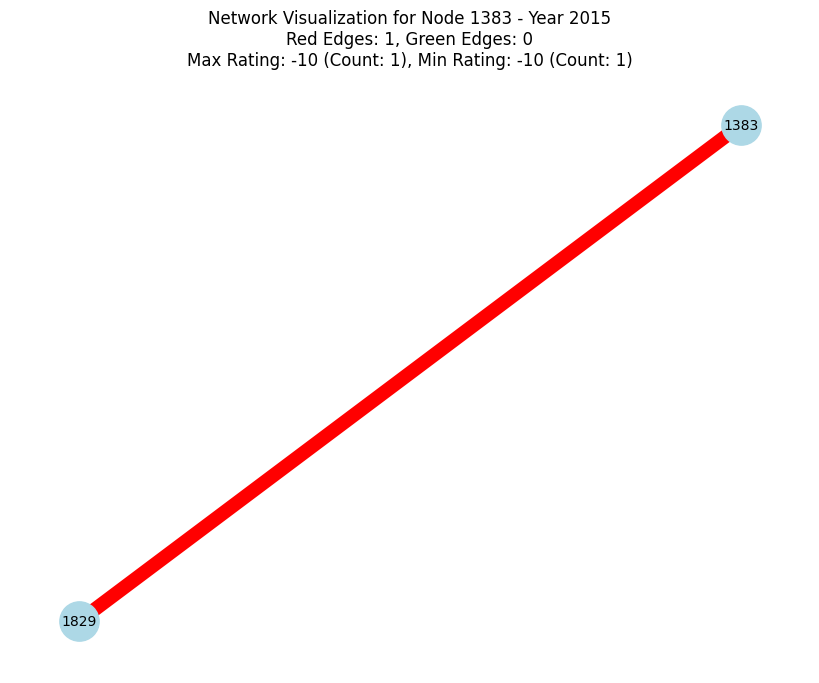

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Plot the network for each year from 2011 to 2015
for year in range(2011, 2016):
    # Filter the DataFrame to include only the edges connected to node 25 for the current year
    subgraph_df_year = df[(df['Target'] == 1383) & (df['Time'].dt.year == year)]

    # Create a directed graph
    G = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', 'Rating', create_using=nx.DiGraph())

    # Assign edge colors and thickness based on the sign and magnitude of the rating
    edge_colors = ['green' if r > 0 else 'red' for u, v, r in G.edges(data='Rating')]
    edge_widths = [abs(r) for u, v, r in G.edges(data='Rating')]

    # Count red and green edges
    count_red_edges = edge_colors.count('red')
    count_green_edges = edge_colors.count('green')

    # Calculate the maximum and minimum ratings and their counts
    max_rating = subgraph_df_year['Rating'].max()
    min_rating = subgraph_df_year['Rating'].min()
    count_max_rating = (subgraph_df_year['Rating'] == max_rating).sum()
    count_min_rating = (subgraph_df_year['Rating'] == min_rating).sum()

    # Plot the network for the current year
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # Layout for the nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, edge_color=edge_colors, width=edge_widths, arrows=False)

    # Add count of red and green edges, max and min ratings, and their counts to the title
    plt.title(f'Network Visualization for Node 1383 - Year {year}\nRed Edges: {count_red_edges}, Green Edges: {count_green_edges}\nMax Rating: {max_rating} (Count: {count_max_rating}), Min Rating: {min_rating} (Count: {count_min_rating})')

    plt.show()


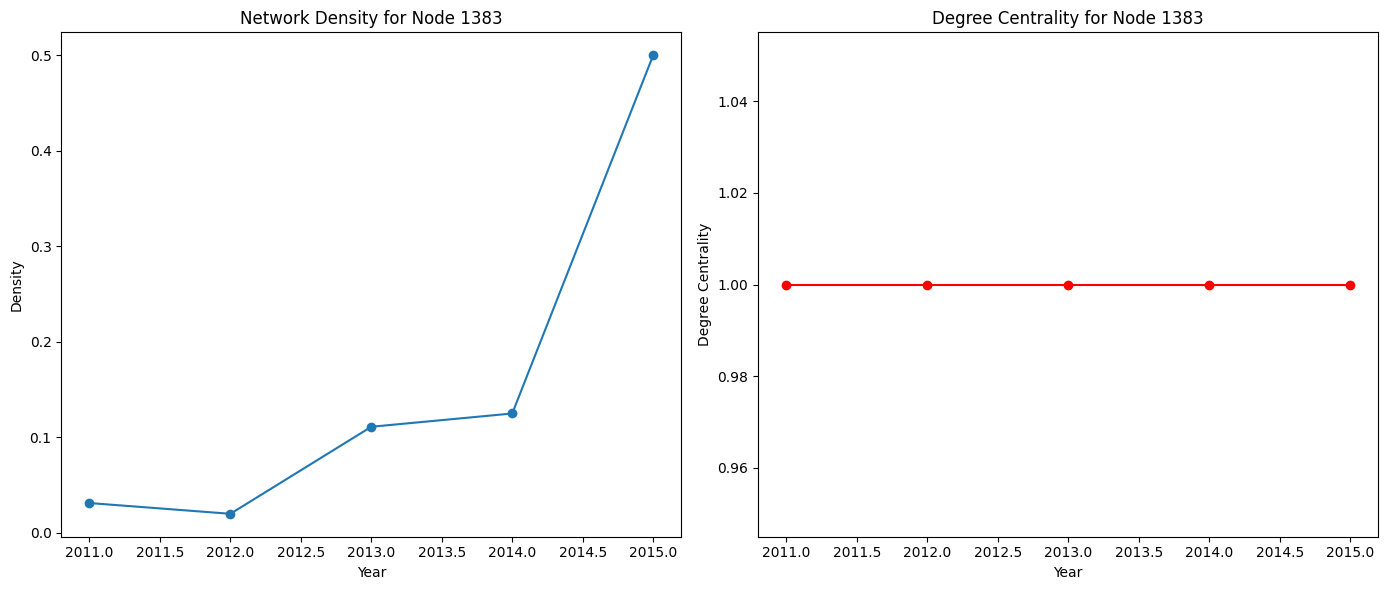

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Initialize lists to store metrics over years
densities = []
degree_centralities = []

for year in range(2011, 2016):
    subgraph_df_year = df[(df['Target'] == 1383) & (df['Time'].dt.year == year)]
    G_year = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', 'Rating', create_using=nx.DiGraph())

    # Calculate and store network density
    densities.append(nx.density(G_year))

    # Calculate and store degree centrality for Node 1383
    if 1383 in G_year.nodes:
        degree_centralities.append(nx.degree_centrality(G_year)[1383])
    else:
        degree_centralities.append(0)  # Node 1383 might not be present in the network for this year

# Plotting the results
years = range(2011, 2016)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(years, densities, marker='o')
plt.title('Network Density for Node 1383')
plt.xlabel('Year')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.plot(years, degree_centralities, marker='o', color='r')
plt.title('Degree Centrality for Node 1383')
plt.xlabel('Year')
plt.ylabel('Degree Centrality')

plt.tight_layout()
plt.show()


# **Influence analysis**

In [ ]:
# Initialize a dictionary to store the most influential node per year
most_influential_node_per_year = {}

# Loop through each year and calculate degree centrality
for year in range(2011, 2016):
    # Filter the DataFrame for the given year
    subgraph_df_year = df[df['Time'].dt.year == year]
    # Create a graph from the filtered DataFrame
    G_year = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', create_using=nx.DiGraph())
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G_year)
    # Identify the most influential node
    max_centrality_node = max(degree_centrality, key=degree_centrality.get)
    max_centrality_value = degree_centrality[max_centrality_node]
    # Store the result
    most_influential_node_per_year[year] = (max_centrality_node, max_centrality_value)

# Display the most influential node for each year
for year, (node, centrality) in most_influential_node_per_year.items():
    print(f"Year {year}: Most Influential Node = {node} with Degree Centrality = {centrality}")


Year 2011: Most Influential Node = 7 with Degree Centrality = 0.21120689655172414
Year 2012: Most Influential Node = 35 with Degree Centrality = 0.21766233766233767
Year 2013: Most Influential Node = 2642 with Degree Centrality = 0.2402088772845953
Year 2014: Most Influential Node = 3988 with Degree Centrality = 0.23164335664335664
Year 2015: Most Influential Node = 35 with Degree Centrality = 0.1918918918918919


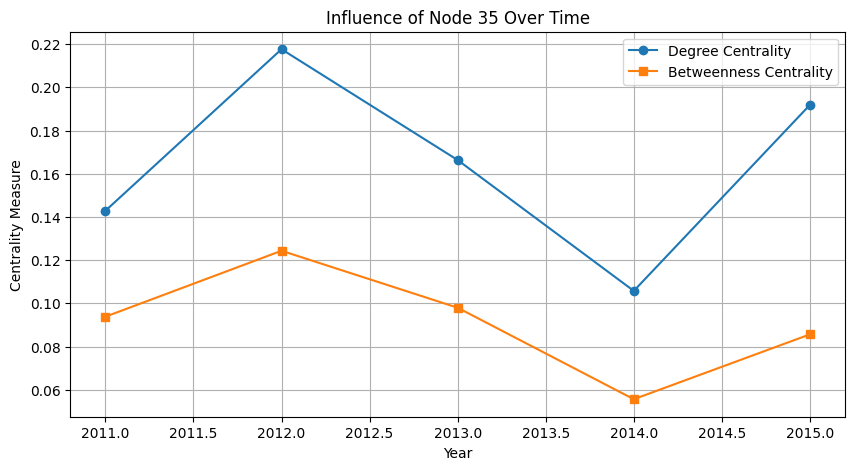

In [ ]:
# Choose a specific node to track
specific_node = 35
# (Specify the node ID here)

# Initialize lists to store centrality measures over years
degree_centrality_over_time = []
betweenness_centrality_over_time = []

# Loop through each year and calculate centralities for the specific node
for year in range(2011, 2016):
    # Filter the DataFrame for the given year
    subgraph_df_year = df[df['Time'].dt.year == year]
    # Create a graph from the filtered DataFrame
    G_year = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', create_using=nx.DiGraph())
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G_year).get(specific_node, 0)
    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G_year).get(specific_node, 0)
    # Store the results
    degree_centrality_over_time.append(degree_centrality)
    betweenness_centrality_over_time.append(betweenness_centrality)

# Plotting the results
plt.figure(figsize=(10, 5))
years = range(2011, 2016)
plt.plot(years, degree_centrality_over_time, marker='o', linestyle='-', label='Degree Centrality')
plt.plot(years, betweenness_centrality_over_time, marker='s', linestyle='-', label='Betweenness Centrality')
plt.title(f'Influence of Node {specific_node} Over Time')
plt.xlabel('Year')
plt.ylabel('Centrality Measure')
plt.legend()
plt.grid(True)
plt.show()


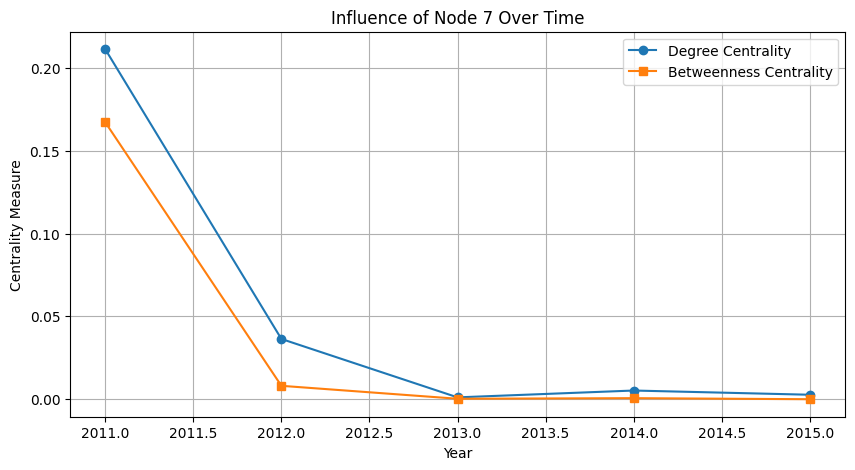

In [ ]:
# Choose a specific node to track
specific_node = 7
# (Specify the node ID here)

# Initialize lists to store centrality measures over years
degree_centrality_over_time = []
betweenness_centrality_over_time = []

# Loop through each year and calculate centralities for the specific node
for year in range(2011, 2016):
    # Filter the DataFrame for the given year
    subgraph_df_year = df[df['Time'].dt.year == year]
    # Create a graph from the filtered DataFrame
    G_year = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', create_using=nx.DiGraph())
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G_year).get(specific_node, 0)
    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G_year).get(specific_node, 0)
    # Store the results
    degree_centrality_over_time.append(degree_centrality)
    betweenness_centrality_over_time.append(betweenness_centrality)

# Plotting the results
plt.figure(figsize=(10, 5))
years = range(2011, 2016)
plt.plot(years, degree_centrality_over_time, marker='o', linestyle='-', label='Degree Centrality')
plt.plot(years, betweenness_centrality_over_time, marker='s', linestyle='-', label='Betweenness Centrality')
plt.title(f'Influence of Node {specific_node} Over Time')
plt.xlabel('Year')
plt.ylabel('Centrality Measure')
plt.legend()
plt.grid(True)
plt.show()


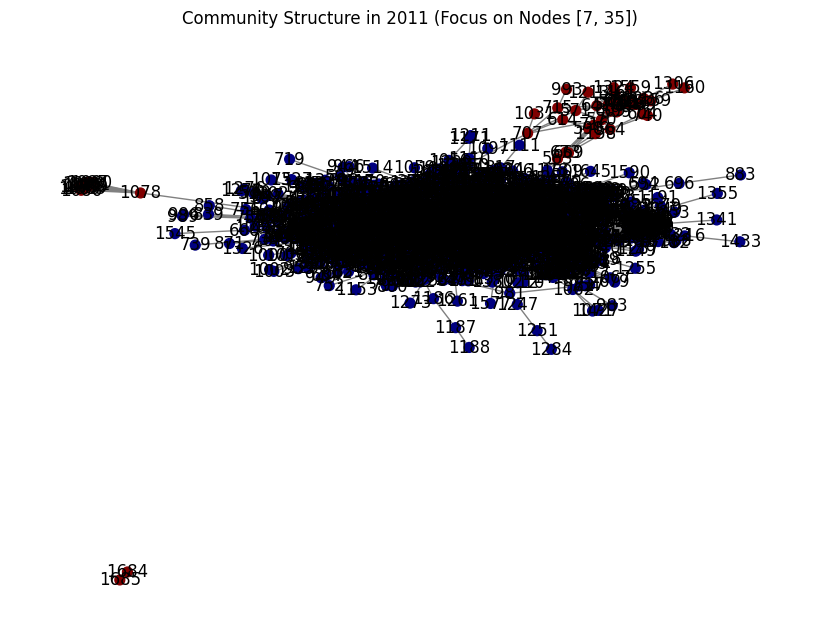

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import itertools

def apply_girvan_newman_and_visualize_specific_nodes(year, specific_nodes=[7, 35]):
    # Filter the DataFrame for the specific year
    subgraph_df_year = df[df['Time'].dt.year == year]
    G_year = nx.from_pandas_edgelist(subgraph_df_year, 'Source', 'Target', create_using=nx.Graph())

    # Applying the Girvan-Newman algorithm
    communities_generator = girvan_newman(G_year)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    sorted_communities = sorted(map(sorted, next_level_communities))

    # Create a community map where each node is assigned a community number
    community_map = {}
    for i, community in enumerate(sorted_communities):
        for node in community:
            community_map[node] = i

    # Check which community the specific nodes belong to
    specific_nodes_communities = {node: community_map[node] for node in specific_nodes if node in community_map}

    # Highlight only the communities of the specific nodes
    color_map = []
    for node in G_year:
        if node in specific_nodes_communities:
            # Specific node's community color
            color_map.append(specific_nodes_communities[node])
        elif node in community_map and community_map[node] in specific_nodes_communities.values():
            # Same community as specific node
            color_map.append(community_map[node])
        else:
            # Other community
            color_map.append(len(sorted_communities) + 1)  # A distinct color for non-relevant communities

    # Visualization
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G_year)
    nx.draw(G_year, pos, node_color=color_map, with_labels=True, cmap=plt.cm.jet, node_size=50, edge_color="gray")
    # Highlight specific nodes
    nx.draw_networkx_nodes(G_year, pos, nodelist=specific_nodes, node_color="gold", node_size=150, edgecolors="black", linewidths=2)
    plt.title(f'Community Structure in {year} (Focus on Nodes {specific_nodes})')
    plt.show()

# Apply the function for years 2011 to 2015
for year in range(2011, 2016):
    apply_girvan_newman_and_visualize_specific_nodes(year)
